In [2]:
# RSI, Stoch_RSI 추출하는 셀
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import os

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def calculate_stochastic_rsi(data, window=14):
    rsi = calculate_rsi(data, window)
    stoch_rsi = (rsi - rsi.rolling(window=window).min()) / (rsi.rolling(window=window).max() - rsi.rolling(window=window).min())
    return stoch_rsi

def get_stock_data(ticker, start_date, end_date):
    stock_data = fdr.DataReader(ticker, start_date, end_date)
    return stock_data

def main(ticker, start_date, end_date, rsi_window=14, stoch_rsi_window=14):
    data = get_stock_data(ticker, start_date, end_date)
    
    data['RSI'] = calculate_rsi(data, rsi_window)
    data['Stochastic RSI'] = calculate_stochastic_rsi(data, stoch_rsi_window)
    
    return data

# 예시 사용법
tickers = ['006400', '018260', '022100', '307950', '286940', '272210', '035510', '069960', '005930', '035420', '003550', '034730', '035720', '000660', '030200', '005380', '005490']
start_date = '2017-12-01'
end_date = '2024-09-01'
for ticker in tickers:
    stock_data = main(ticker, start_date, end_date)
    # print(stock_data[['RSI', 'Stochastic RSI']])
    try:
        stock_data.to_csv("./RSI/{ticker}.csv".format(ticker=ticker))
    except:
        os.makedirs("./RSI")
        stock_data.to_csv("./RSI/{ticker}.csv".format(ticker=ticker))


In [1]:
# 불필요한 구간 삭제
import pandas as pd
import os

tickers = ['006400', '018260', '022100', '307950', '286940', '272210', '035510', '069960', '005930', '035420', '003550', '034730', '035720', '000660', '030200', '005380', '005490']

for ticker in tickers:
    # 주식 데이터 (날짜별 종가가 있는 데이터프레임)
    df = pd.read_csv("./RSI/{ticker}.csv".format(ticker=ticker), header=0)

    # 날짜를 기준으로 정렬 (필요한 경우)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    
    # 종가 기준으로 다음날 주식이 올랐는지(1) 내렸는지(0) 표시하는 target 컬럼 생성
    df['Target'] = (df['Close'].shift(-1) < df['Close']).astype(int) # 상승 0, 하락 1
    df.drop(df.index[:31], inplace=True)
    df.reset_index(drop=True, inplace=True)

    # 결과 저장
    output_dir = "./add_target"
    output_file = f"{output_dir}/{ticker}.csv"
    
    # 디렉토리가 없는 경우 생성
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    
    # CSV 파일 저장
    df.to_csv(output_file, index=False) 

In [ ]:
# 데이터 csv 병합하는 셀

import pandas as pd
import os

dates = ["20210801", "20211201", "20220401", "20220801", "20221201", "20230401", "20230801", "20231201", "20240401", "20240801"]
codes = ['006400', '018260', '022100', '307950', '286940', '272210', '035510', '069960', '005930', '035420', '003550', '034730', '035720', '000660', '030200', '005380', '005490'] # 종목코드



for ticker in codes:
    retract_test_lst = pd.DataFrame()
    for date in dates:
        test = pd.read_csv("./dailysource/{ticker}/{date}.csv".format(ticker = ticker, date = date))
        retract_test_lst = pd.concat([retract_test_lst, test], ignore_index=True)

# print(retract_test_lst)

    df_sorted = retract_test_lst.sort_values(by='stck_bsop_date', ascending=False)
    try:
        df_sorted.to_csv("./dailysource/{ticker}.csv".format(ticker = ticker), index=False)
    except:
        os.mkdir("./dailysource/")
        df_sorted.to_csv("./dailysource/{ticker}.csv".format(ticker = ticker), index=False)

# for i in range(len(test_drop)-1):
#     retract_drop = test_drop["stck_clpr"][i] - test_drop["stck_clpr"][i+1]
#     retract_test_lst.append(retract_drop)

# print(retract_test_lst)

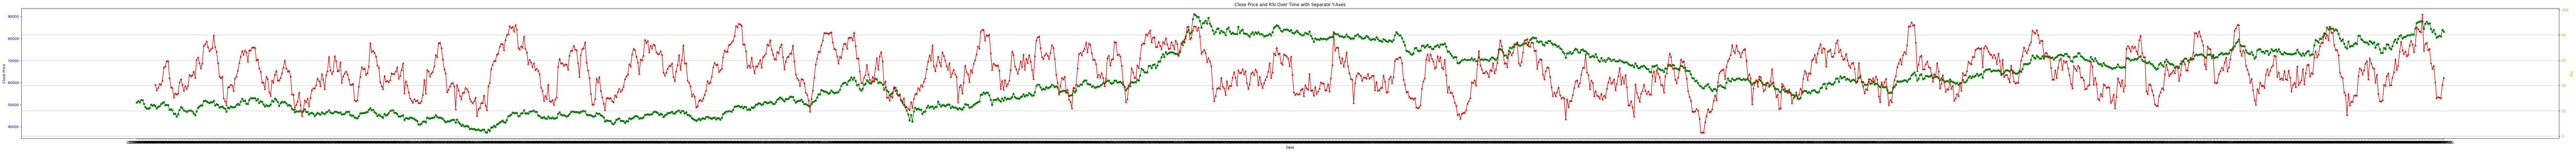

In [25]:
# 그래프 그리는 셀
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = './test.csv'

# CSV 파일을 읽어 DataFrame으로 변환
df = pd.read_csv(file_path)

# # 샘플 데이터
# data = {
#     "Date": ["2020-01-02", "2020-01-03", "2020-01-06", "2020-01-07", "2020-01-08"],
#     "Close": [55200, 55600, 55700, 55800, 56000],
#     "RSI": [45, 48, 50, 53, 55]
# }
# df = pd.DataFrame(data)
# df['Date'] = pd.to_datetime(df['Date'])  # 날짜 형식을 datetime으로 변환

# # 그래프 크기 설정
# plt.figure(figsize=(10, 6))

# # Close 데이터 시각화
# plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', marker='o', markersize=5)

# # RSI 데이터 시각화
# plt.plot(df['Date'], df['RSI'], label='RSI', color='orange', marker='o', markersize=5)

# # 그래프 제목과 축 라벨 설정
# plt.title('Close Price and RSI Over Time')
# plt.xlabel('Date')
# plt.ylabel('Value')

# # 범례 추가
# plt.legend()

# # 그리드 추가
# plt.grid(True)

# # X축 날짜 회전
# plt.xticks(rotation=45)

# # 그래프 레이아웃 최적화
# plt.tight_layout()

# # 그래프 출력
# plt.show()


# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(100, 6))

# 첫 번째 Y축: Close 데이터
ax1.plot(df['Date'], df['Close'], label='Close Price', color='g', marker='o', markersize=5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 조건에 따라 색상을 변경하기 위한 논리적 조건
rsi_upper = 70
rsi_lower = 30
colors = ['red' if rsi > rsi_upper else 'black' if rsi > rsi_lower else 'blue' for rsi in df['RSI']]


# 두 번째 Y축: RSI 데이터
ax2 = ax1.twinx()  # 두 번째 Y축 공유
ax2.plot(df['Date'], df['RSI'], label='RSI', color='red', marker='^', markersize=4)
# RSI 데이터 시각화
plt.scatter(df['Date'], df['RSI'], color=colors, marker='^', s=4)
ax2.set_ylabel('RSI', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 설정
plt.title('Close Price and RSI Over Time with Separate Y-Axes')

# 그래프 레이아웃 최적화
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()
